## Fish weight  prediction

#### This is a regression problem in which, we will try to predict Fish weight.

#### https://www.kaggle.com/code/nitinchoudhary012/fish-weight-prediction/data

##### Attribute information

##### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from fancyimpute import IterativeImputer

##### Loading the dataset

In [2]:
data = pd.read_csv("Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [5]:
data.shape

(159, 7)

##### Check for null values

In [6]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

##### No null values

##### Outlier treatment

##### Box plots

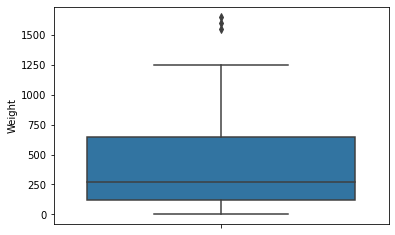

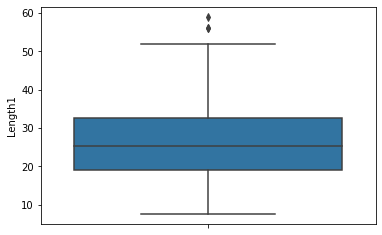

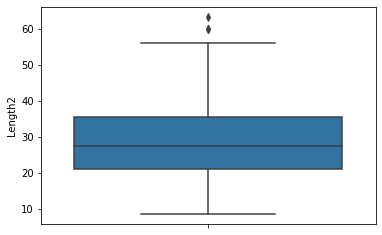

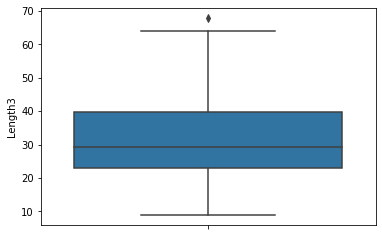

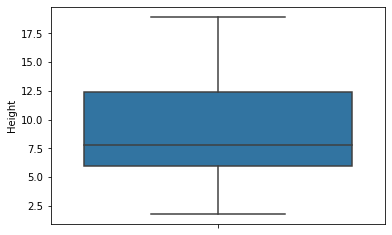

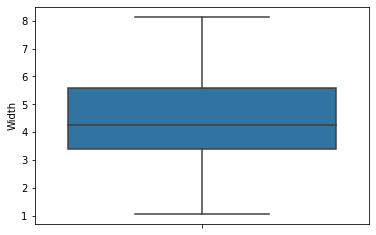

In [7]:
for i in data.columns:
    if data[i].dtype!= "object":
        sns.boxplot(y=data[i])
        plt.show()

##### Setting outlier limits

In [8]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [9]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

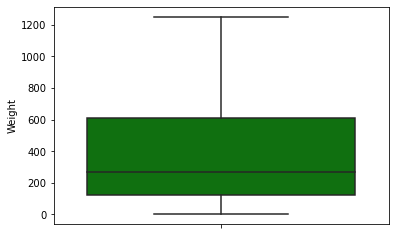

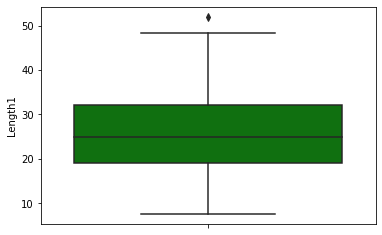

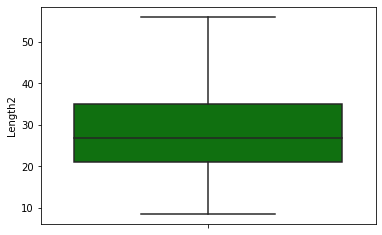

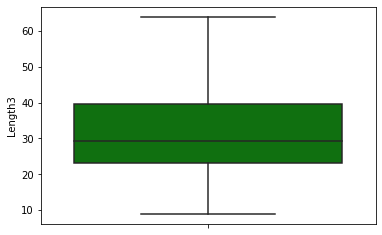

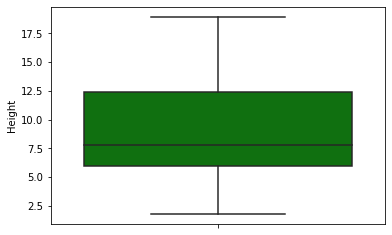

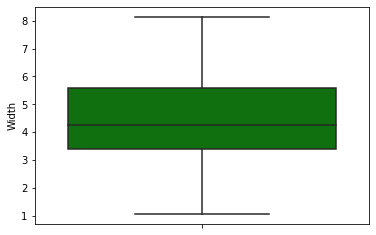

In [10]:
for i in data.columns:
    if data[i].dtype!= "object":
        sns.boxplot(y=data[i], color="Green")
        plt.show()

#### We have treated the outliers. Lets drop the nan values now.

In [11]:
data.dropna(inplace=True)

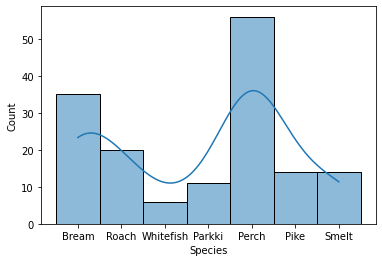

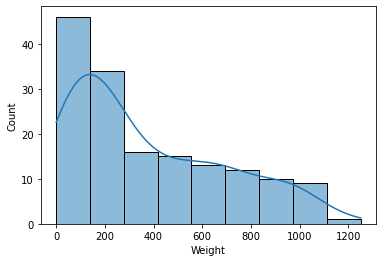

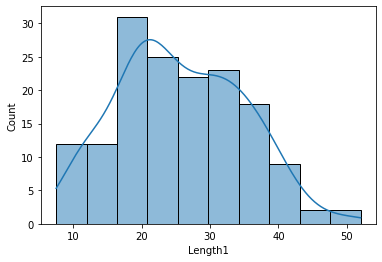

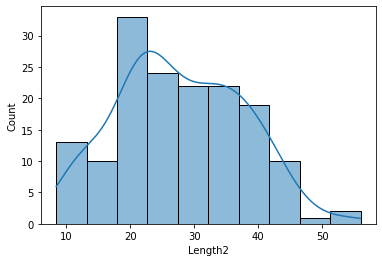

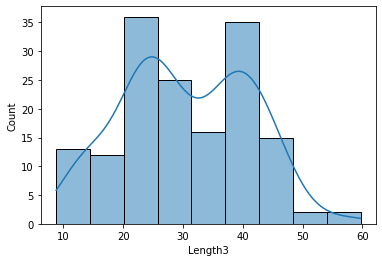

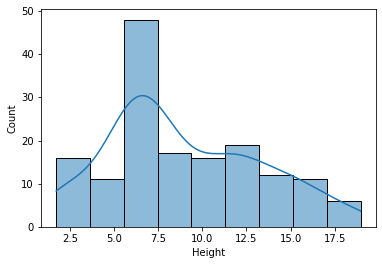

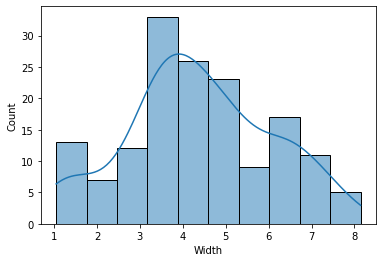

In [12]:
for i in data.columns:
    sns.histplot(data[i], kde=True)
    plt.show()

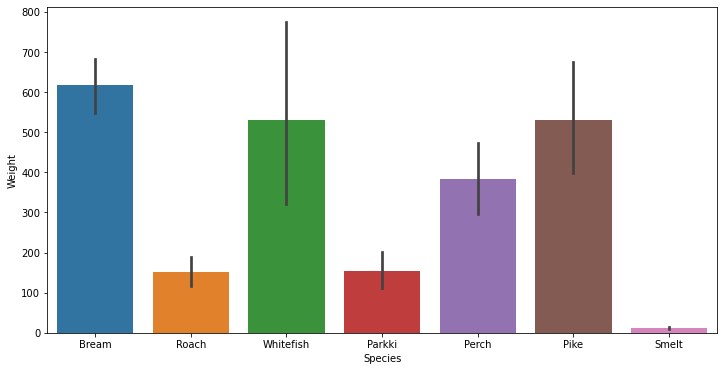

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x=data.Species, y=data.Weight);

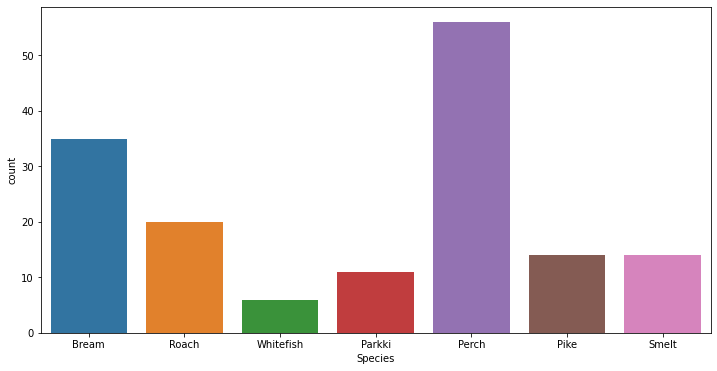

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x=data.Species);

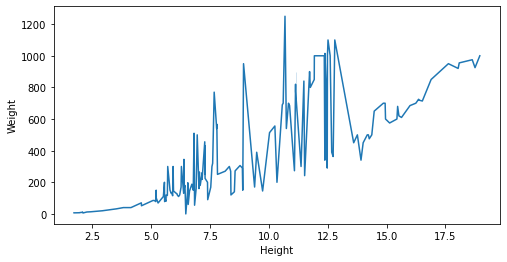

In [15]:
plt.figure(figsize=(8,4))
sns.lineplot(data=data, x=data.Height, y=data.Weight);

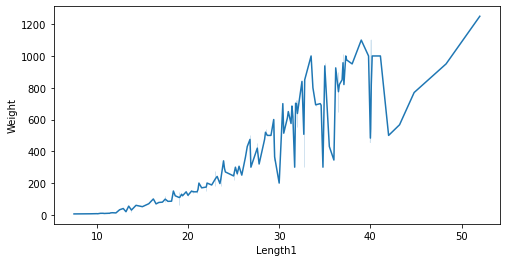

In [16]:
plt.figure(figsize=(8,4))
sns.lineplot(data=data, x=data.Length1, y=data.Weight);

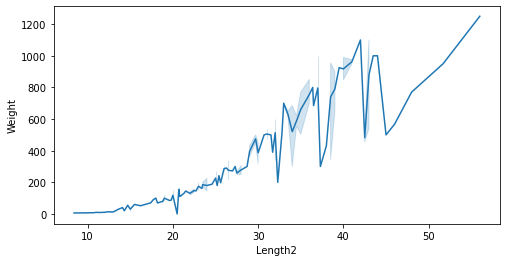

In [17]:
plt.figure(figsize=(8,4))
sns.lineplot(data=data, x=data.Length2, y=data.Weight);

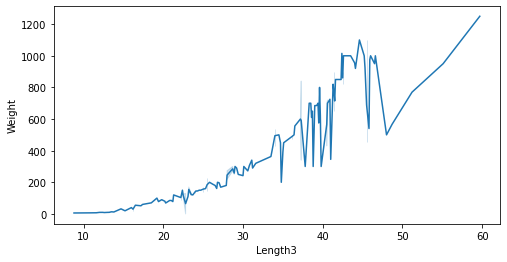

In [18]:
plt.figure(figsize=(8,4))
sns.lineplot(data=data, x=data.Length3, y=data.Weight);

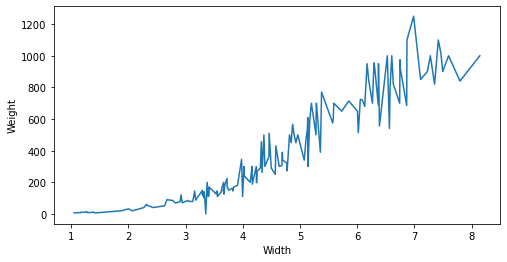

In [19]:
plt.figure(figsize=(8,4))
sns.lineplot(data=data, x=data.Width, y=data.Weight);

##### Check for duplicated data

In [20]:
data.duplicated().sum()

0

##### No duplicate entries

##### Correlation matrix

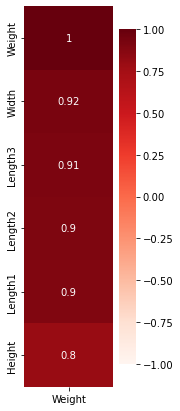

In [21]:
plt.figure(figsize=(2, 7))
heatmap = sns.heatmap(data.corr()[['Weight']].sort_values(by='Weight', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Reds')

#### All the variables are highly correlated with the target variable.

##### Label encoding categorical column "Spiecies"

In [22]:
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         14
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [23]:
data.replace({"Perch":7,"Bream":6,"Roach":5,"Pike":4,"Smelt":3,"Parkki":2,"Whitefish":1}, inplace=True)

In [24]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,6,242.0,23.2,25.4,30.0,11.5200,4.0200
1,6,290.0,24.0,26.3,31.2,12.4800,4.3056
2,6,340.0,23.9,26.5,31.1,12.3778,4.6961
3,6,363.0,26.3,29.0,33.5,12.7300,4.4555
4,6,430.0,26.5,29.0,34.0,12.4440,5.1340


#### Selecting x & y

In [25]:
x = data.drop("Weight", axis=1).values

In [26]:
y = data["Weight"].values

#### Scaling x

In [27]:
sc = StandardScaler()

In [28]:
x = sc.fit_transform(x)

##### Splitting the data into training and testing

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Model building

In [30]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

In [31]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    score = r2_score(y_test, model.predict(x_test))
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  0.9220607410135702
mae:  72.5628266706201
mse:  7343.549844446339
rmse_test:  85.69451466953028
****************************************************************************************************
model trained with Ridge
r2score:  0.9121387422934994
mae:  76.96612308489678
mse:  8278.414931758218
rmse_test:  90.98579521968371
****************************************************************************************************
model trained with LinearSVR
r2score:  -0.47223337179953284
mae:  276.72903350166155
mse:  138715.9602113944
rmse_test:  372.44591582053147
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  0.9380841412065849
mae:  51.16875
mse:  5833.801875
rmse_test:  76.37932884622646
****************************************************************************************************
model trained with GradientBoostingRegressor
r2sc

##### We can see that the RandomForestRegressor is having th best perfomance. Lts try to increase its accuracy using Hyper parameter tuning.

### Hyper parameter tuning

In [32]:
rfr = RandomForestRegressor(random_state=0)

#### Setting the parameters

In [33]:
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)]
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(start=10, stop=2000, num = 100)] 
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

In [34]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=0, n_jobs=-1, return_train_score=True)

In [35]:
rfr_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 30, 50, 70, 90, 110,
                                                      130, 150, 170, 190, 211,
                                                      231, 251, 271, 291, 311,
                                                      331, 351, 371, 391, 412,
                                                      432, 452, 472, 492, 512,
                                                      532, 552, 572, 592, ...],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_absolute_error', ver

In [36]:
rfr_random.best_params_

{'n_estimators': 13,
 'max_features': 'auto',
 'max_depth': 1839,
 'bootstrap': True}

In [37]:
rfr_best = RandomForestRegressor(n_estimators=13, max_features="auto", max_depth=1839, bootstrap=True)

In [38]:
rfr_best.fit(x_train, y_train)

RandomForestRegressor(max_depth=1839, n_estimators=13)

##### Metrics after Hyper parametric tuning

In [39]:
training_score = rfr_best.score(x_train, y_train)*100
testing_score = rfr_best.score(x_test, y_test)*100
score = r2_score(y_test, rfr_best.predict(x_test))*100
mae = mean_absolute_error(y_test, rfr_best.predict(x_test))
mse = mean_squared_error(y_test, rfr_best.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

r2score:  96.03242617848935
training_score:  99.3478445339109
testing_score:  96.03242617848935
mae:  40.058894230769226
mse:  3738.3055085059164
rmse_test:  61.141683886738974


#### Since there is no increment after the hyperparameter tuning, we may use the default parameters for the predictions.

In [40]:
rfr =RandomForestRegressor(random_state=0)

In [41]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [42]:
y_pred = rfr_best.predict(x)

##### Saving the output in a data frame

In [43]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"))
OUTPUT.head()

,ACTUAL,PREDICTED
0,242.0,260.538462
1,290.0,297.692308
2,340.0,315.538462
3,363.0,370.307692
4,430.0,410.692308


##### Visualizing the output

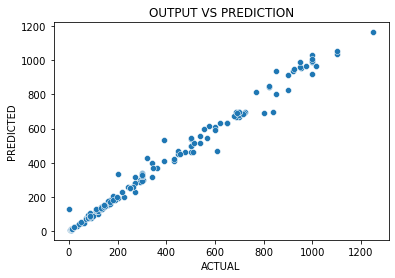

In [44]:
plt.title("OUTPUT VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");